In [1]:
from convml_tt.interpretation.plots import dendrogram
from convml_tt.data.examples import (
    fetch_example_dataset,
    ExampleData,
    load_pretrained_model,
    PretrainedModel,
)
from convml_tt.utils import get_embeddings
from convml_tt.data.dataset import ImageTripletDataset, TileType
from convml_tt.data.transforms import get_transforms

from pathlib import Path
import xarray as xr

In [2]:
data_path = fetch_example_dataset(dataset=ExampleData.SMALL100)
data_path

Using downloaded and verified file: data/Nx256_s200000.0_N0study_N100train.tgz
Extracting data/Nx256_s200000.0_N0study_N100train.tgz to data/


PosixPath('data/Nx256_s200000.0_N0study_N100train')

In [3]:
model = load_pretrained_model(pretrained_model=PretrainedModel.FIXED_NORM_STAGE2)

Using downloaded and verified file: data/fixednorm-stage-2.tgz
Extracting data/fixednorm-stage-2.tgz to data/
Weights loaded from `data/fixednorm-stage-2.torch.pkl`


In [4]:
dataset = ImageTripletDataset(
    data_dir=data_path,
    transform=get_transforms(step="predict", normalize_for_arch=model.base_arch),
)

In [5]:
fn = Path("embs.nc")
if not fn.exists():
    da_embs = get_embeddings(tile_dataset=dataset, model=model)
    da_embs.to_netcdf(fn)
else:
    da_embs = xr.open_dataarray(fn)

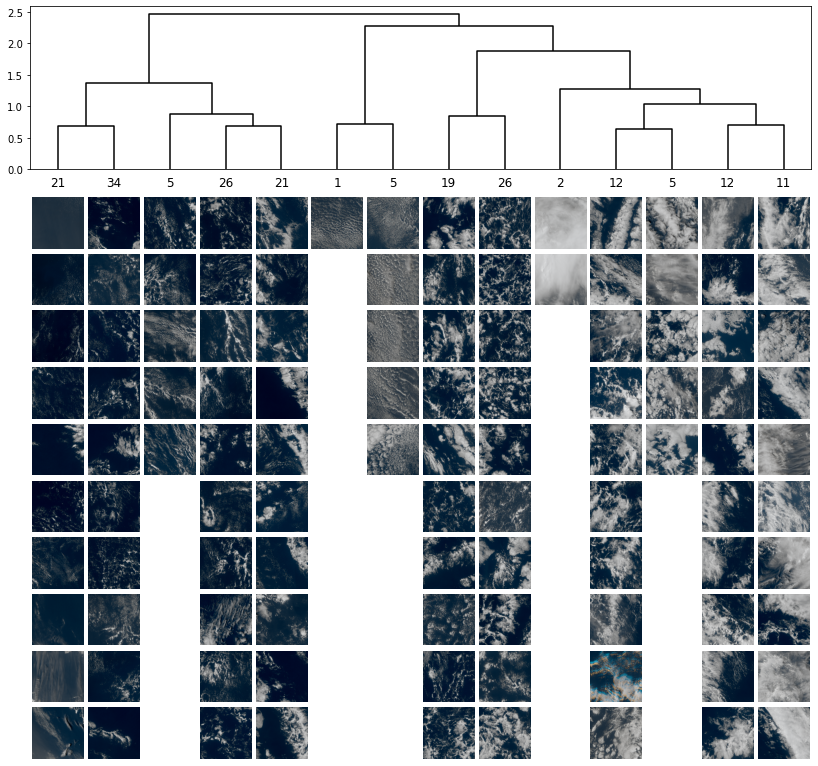

In [6]:
dendrogram(
    da_embeddings=da_embs,
    tile_type="anchor",
    n_clusters_max=14,
    n_samples=10,
    sampling_method="best_triplets",
)

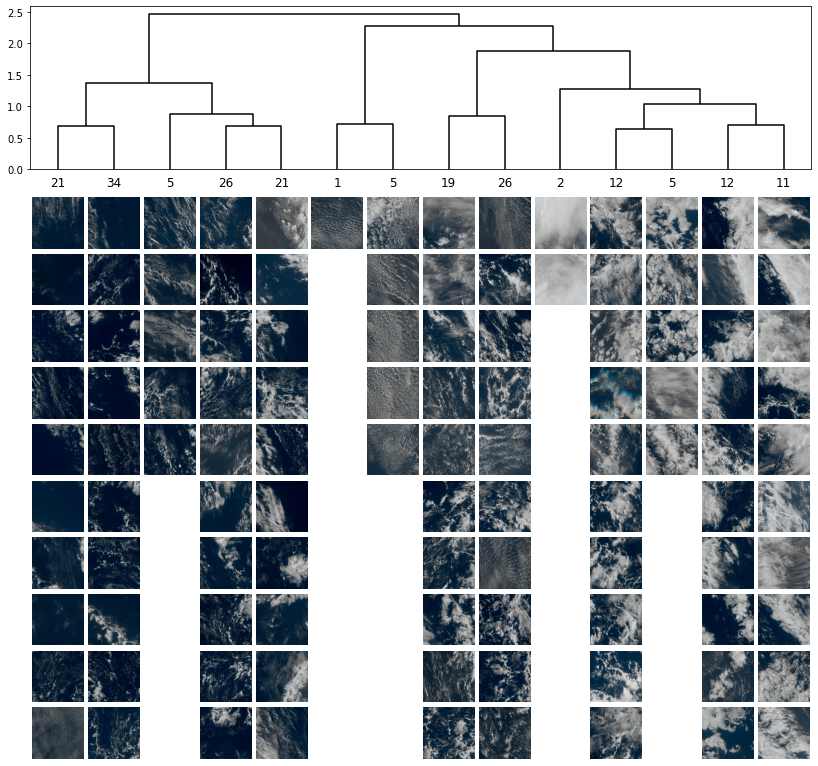

In [7]:
dendrogram(
    da_embeddings=da_embs,
    tile_type="anchor",
    n_clusters_max=14,
    n_samples=10,
    sampling_method="worst_triplets",
)

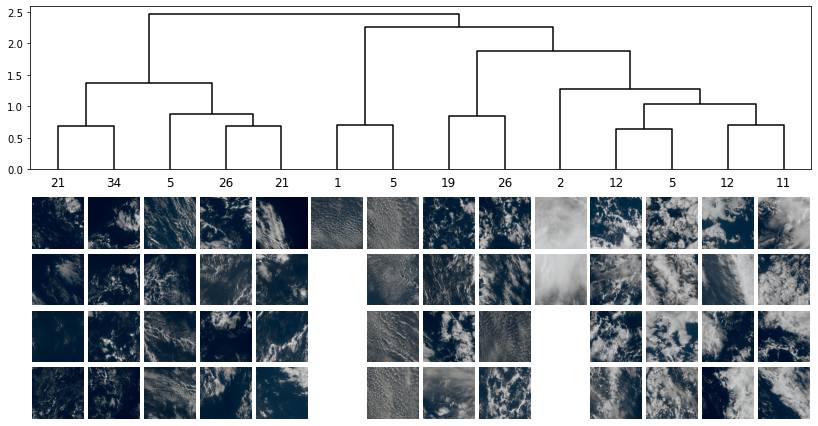

In [8]:
dendrogram(
    da_embeddings=da_embs,
    tile_type="anchor",
    n_clusters_max=14,
    n_samples=4,
    sampling_method="random",
)